# **Multi-class Classification on Digits Dataset Logistic Regression using sigmoid Function ( One vs Rest )**

In [67]:
import numpy as np
from sklearn.datasets import load_digits
import math, copy

In [68]:
digits = load_digits()
X = digits.data
y = digits.target

In [69]:
print(y)

[0 1 2 ... 8 9 8]


In [70]:
# Just labels 0,1,2 taken
mask = (y == 0) | (y == 1) | (y == 2)
X = X[mask]
y = y[mask]


In [71]:
X.shape


(537, 64)

In [72]:
y.shape

(537,)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **OvR Labels**

In [123]:
# single value labeling for 0 excluding the 1, 2

def make_binary_label(y, label):
    binary_y = np.where(y == label, 1, 0)
    return binary_y

In [124]:
# Assigning binary values
y0_train = make_binary_label(y_train, 0).ravel()
y1_train = make_binary_label(y_train, 1).ravel()
y2_train = make_binary_label(y_train, 2).ravel()

## **Sigmoid function**

In [125]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

## **Compute cost (sigmoid)**

In [79]:
def compute_cost_logistics(X, y, w, b, lambda_ = 1):

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i + 1e-15) - (1-y[i])*np.log(1-f_wb_i + 1e-15)      #scalar

    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

## **Compute Gradients (sigmoid)**

In [106]:
def compute_gradient_logistics(X, y, w, b, lambda_ = 0.01):

    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):

        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i - y[i]
        for j in range(n):

            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]

    return dj_dw, dj_db


# **Compute Gradient Descent (sigmoid)**

In [107]:
def gradient_descent_logistic(x, y, w_in, b_in, alpha, num_iters):

    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        # calculate gradient and update paramters
        dj_dw, dj_db = compute_gradient_logistics(x,y,w,b, lambda_ = 0.01)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        cost_history.append(compute_cost_logistics(x, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i+10:4d}: Cost {cost_history[-1]}")
    print('Next Class Training')
    return w, b, cost_history         #return final w,b and J history for graphing


In [108]:
# Initialize weights/bias
w_init = abs(np.random.randn(64)*0.01)  # vector for binary logistic regression
b_init = 0.0
alpha = 0.01
iters = 1000

## **Training Loop (sigmoid)**

In [126]:
# Train for class 0
w0, b0, cost0 = gradient_descent_logistic(X_train, y0_train, w_init, b_init, alpha, iters)
# Train for class 1
w1, b1, cost1 = gradient_descent_logistic(X_train, y1_train, w_init, b_init, alpha, iters)
# Train for class 2
w2, b2, cost2 = gradient_descent_logistic(X_train, y2_train, w_init, b_init, alpha, iters)

Iteration   10: Cost 3.884827548995729
Iteration  110: Cost 0.007981096925158327
Iteration  210: Cost 0.005074214316159145
Iteration  310: Cost 0.003864067944724313
Iteration  410: Cost 0.003183080617579391
Iteration  510: Cost 0.00274232167188761
Iteration  610: Cost 0.0024325887080398354
Iteration  710: Cost 0.0022027331851458562
Iteration  810: Cost 0.0020253850105663154
Iteration  910: Cost 0.0018844915508751273
Next Class Training
Iteration   10: Cost 4.20239806298473
Iteration  110: Cost 0.022032596697703938
Iteration  210: Cost 0.014352231991582042
Iteration  310: Cost 0.010944267687235392
Iteration  410: Cost 0.00898351467307288
Iteration  510: Cost 0.007700434759823193
Iteration  610: Cost 0.0067925365473514646
Iteration  710: Cost 0.006115319657161673
Iteration  810: Cost 0.005590585099469072
Iteration  910: Cost 0.005172142035321944
Next Class Training
Iteration   10: Cost 4.179334239134849
Iteration  110: Cost 0.03191327035360032
Iteration  210: Cost 0.02026059584637821
Ite

## **Predict OvR**

In [114]:
def predict_ovr(x, w0, b0, w1, b1, w2, b2):

    # Probabilities for each class
    p0 = sigmoid(np.dot(x,w0)+b0) # it will just store a float number not array
    p1 = sigmoid(np.dot(x,w1)+b1) # it will just store a float number not array
    p2 = sigmoid(np.dot(x,w2)+b2) # it will just store a float number not array

    # Converting Row-col(Transpose) and Stack them together (m x 3 matrix)
    probs = np.stack((p0, p1, p2), axis=1)

    # Return the class with the highest probability
    return np.argmax(probs, axis=1) # check each sample(row)

In [132]:
y_pred_test = predict_ovr(X_test, w0, b0, w1, b1, w2, b2)

### Accuracy

In [133]:
accuracy_test = np.sum(y_pred_test == y_test) / y_test.shape[0]
print(f"Test Accuracy: {accuracy_test*100:.2f}%")

# Test Accuracy: 100.00%

"""
It is 100% because the datset is very small and we also select some labels from
them, so it becomes more small that's why it trains well and correct
 -> Our Traget is to how train some selected labels (e.g; 0,1,2) from the entire
    dataset and apply sigmoid to make it binary classification
"""

Test Accuracy: 100.00%


In [137]:
# Show first 20 samples
for i in range(20):
    print(f"Sample {i}: Actual = {y_test[i]}, Predicted = {y_pred_test[i]}")

Sample 0: Actual = 1, Predicted = 1
Sample 1: Actual = 1, Predicted = 1
Sample 2: Actual = 2, Predicted = 2
Sample 3: Actual = 2, Predicted = 2
Sample 4: Actual = 1, Predicted = 1
Sample 5: Actual = 0, Predicted = 0
Sample 6: Actual = 2, Predicted = 2
Sample 7: Actual = 1, Predicted = 1
Sample 8: Actual = 1, Predicted = 1
Sample 9: Actual = 0, Predicted = 0
Sample 10: Actual = 0, Predicted = 0
Sample 11: Actual = 2, Predicted = 2
Sample 12: Actual = 1, Predicted = 1
Sample 13: Actual = 2, Predicted = 2
Sample 14: Actual = 0, Predicted = 0
Sample 15: Actual = 0, Predicted = 0
Sample 16: Actual = 2, Predicted = 2
Sample 17: Actual = 2, Predicted = 2
Sample 18: Actual = 0, Predicted = 0
Sample 19: Actual = 2, Predicted = 2


### **Visualize the Digit Images**

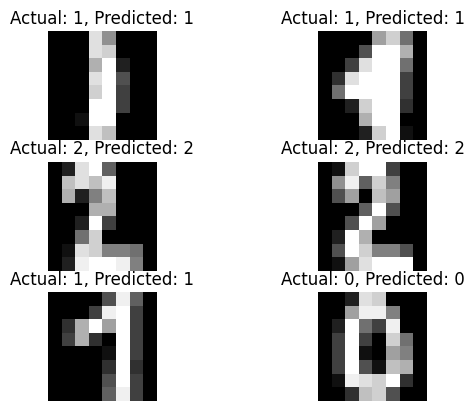

In [139]:
import matplotlib.pyplot as plt

for i in range(6):  # show 5 test samples
    # plt.figure(figsize=(2,2))
    plt.subplot(3,2,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Actual: {y_test[i]}, Predicted: {y_pred_test[i]}")
    plt.axis('off')
plt.show()


# -------------------- **Using Built-in Functions**  -------------------------

# **Multi-Class Classification using Built-in Model Logistic regression**

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [142]:
y_pred = model.predict(X_test)

In [143]:
y_pred

array([1, 1, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0])

In [144]:
model.predict_proba(X_test)

array([[3.22330193e-09, 9.99394079e-01, 6.05918151e-04],
       [1.90371155e-06, 9.99998096e-01, 6.34691641e-11],
       [1.74192540e-08, 1.31133108e-05, 9.99986869e-01],
       [5.40327098e-07, 5.50877709e-09, 9.99999454e-01],
       [1.46299651e-02, 9.85331212e-01, 3.88230027e-05],
       [9.99999836e-01, 4.29132716e-09, 1.59593159e-07],
       [1.16607568e-08, 1.59908670e-05, 9.99983997e-01],
       [9.21574420e-06, 9.99990176e-01, 6.08127513e-07],
       [1.61308179e-06, 9.99986184e-01, 1.22025154e-05],
       [9.99999595e-01, 4.11818713e-10, 4.04906550e-07],
       [9.99901837e-01, 5.69455212e-08, 9.81063134e-05],
       [5.51546575e-08, 4.47531094e-05, 9.99955192e-01],
       [2.21080063e-09, 9.94840309e-01, 5.15968900e-03],
       [6.41932519e-05, 2.69769903e-04, 9.99666037e-01],
       [9.99499930e-01, 5.00052770e-04, 1.68752254e-08],
       [9.99794925e-01, 1.12454644e-09, 2.05074234e-04],
       [1.49946538e-04, 1.51598763e-08, 9.99850038e-01],
       [2.20344100e-08, 5.23313

In [146]:
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_test)

In [152]:
print(f'The final accuracy of the model is: {accuracy*100:.2f}%')
print()
# print('Reports:', classification_report )

The final accuracy of the model is: 100.00%



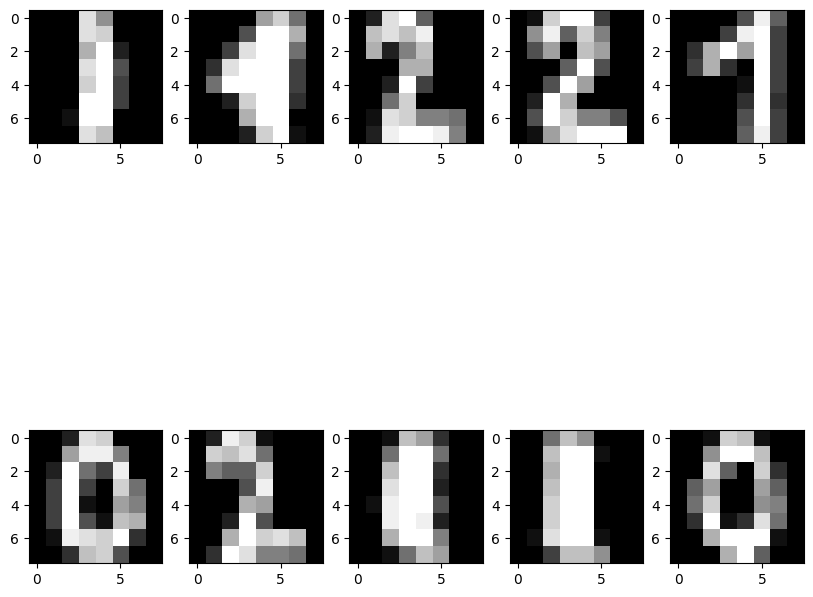

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')